In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("car_prices.csv")
df.head()

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634


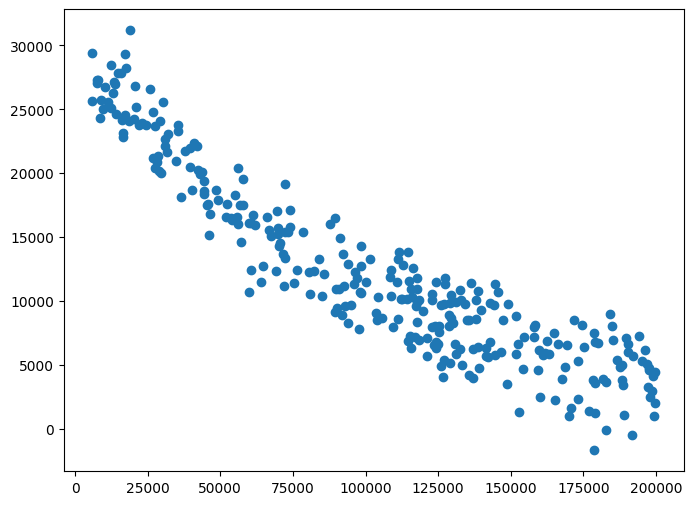

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df.mileage,df.selling_price)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

x=df[['mileage']]
y=df[['selling_price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=5)


In [6]:
x_train.shape

(240,)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [13]:
x_train_poly[:5]

array([[1.00000000e+00, 4.45040000e+04, 1.98060602e+09],
       [1.00000000e+00, 4.36600000e+04, 1.90619560e+09],
       [1.00000000e+00, 1.25151000e+05, 1.56627728e+10],
       [1.00000000e+00, 6.40400000e+04, 4.10112160e+09],
       [1.00000000e+00, 1.31324000e+05, 1.72459930e+10]])

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model=LinearRegression()
model.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred=model.predict(x_test_poly)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse,r2

(4078849.538049906, 0.9132438719534159)

In [23]:
x_range=np.linspace(x['mileage'].min(),x['mileage'].max(),300).reshape(-1,1)
x_range_poly=poly.transform(x_range)
y_range_pred=model.predict(x_range_poly)


C:\Users\Tanushree Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


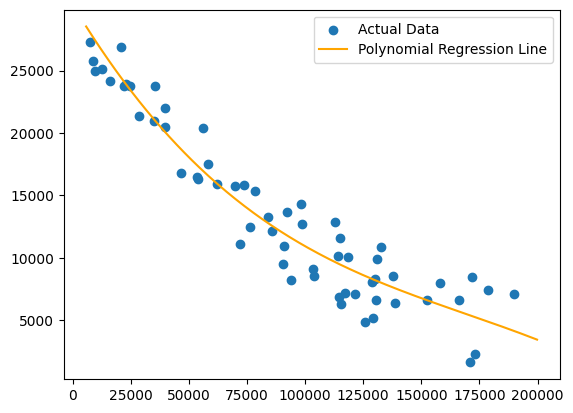

In [25]:
plt.scatter(x_test['mileage'],y_test,label='Actual Data')
plt.plot(x_range,y_range_pred,color='orange',label='Polynomial Regression Line')
plt.legend()
plt.show()